# Documentation of computer vision utilities
___

## Path and directories
___

In [1]:
import os

current_dir = os.path.dirname(os.path.abspath('__file__'))  # current directory
img_dir = os.path.join(current_dir, 'img') # sample image directory

puppy_path = os.path.join(img_dir, 'puppy.jpg') # path to puppy image
graypuppy_path = os.path.join(img_dir, 'graypuppy.jpg' )

pin_path = os.path.join(img_dir, 'pin.png')

spectrum_path = os.path.join(img_dir, 'spectrum.jpg')

## Libraries
___

In [2]:
import numpy as np
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

## Utilities


### Read image
___

In [3]:
def read_img(img_path):
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

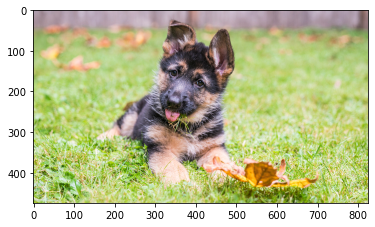

In [4]:
# test on color image
puppy_img = read_img(puppy_path)
plt.imshow(puppy_img)
plt.show()

### View image
___

In [5]:
# auxiliary function to reshape a 1-channel image to 3 identical channels
# while keeping the same image data type
def reshape_2D_img(img):
    if len(img.shape)==2:
        height, width = img.shape # get image dimension
        img_type = img.dtype # get image type
        
        reshaped_img = np.zeros(shape=(height, width, 3),
                             dtype=img_type) # initialize reshaped image
        for channel in range(3):
            reshaped_img[:,:,channel] = img
        
        return reshaped_img
    else:
        pass
    
def view_img(img, title=None):
    if len(img.shape)==2:
        img = reshape_2D_img(img)
    plt.imshow(img)
    if title is not None:
        plt.title(title, fontsize=15)
    plt.show()

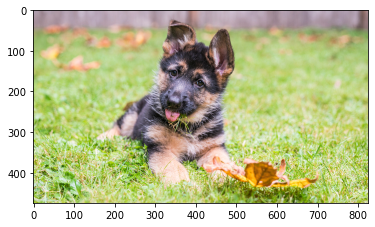

In [6]:
# test on color image
puppy_img = read_img(puppy_path)
view_img(puppy_img)

Size of the grayscale image:  (475, 825)
Size of the original color image:  (475, 825, 3)
Type of the original color image:  uint8
Type of the grayscale image:  uint8


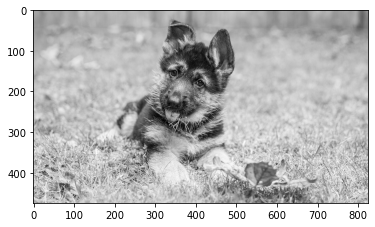

In [7]:
# test on two-dimensional grayscale image
puppy_gray_img = cv.imread(puppy_path, cv.IMREAD_GRAYSCALE)
print("Size of the grayscale image: ", puppy_gray_img.shape)
print("Size of the original color image: ", cv.imread(puppy_path).shape)
print("Type of the original color image: ", cv.imread(puppy_path).dtype)
print("Type of the grayscale image: ", puppy_gray_img.dtype)
view_img(puppy_gray_img)

### Convert to grayscale image
___

In [8]:
# By default, final image is reshaped to three identical channels
def convert_to_gray(img, reshape=True):
    if reshape==True:
        reshaped_img = reshape_2D_img(cv.cvtColor(img, cv.COLOR_RGB2GRAY))
        return reshaped_img
    else:
        return cv.cvtColor(img, cv.COLOR_RGB2GRAY)

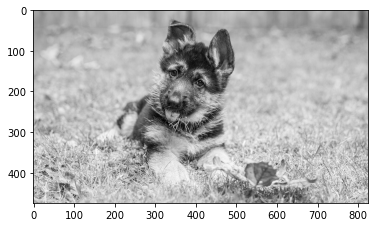

Type of original image:  uint8
Type of grayscale image:  uint8
Shape of original image:  (475, 825, 3)
Shape of grayscale image:  (475, 825, 3)


In [9]:
# test on color image, final image reshaped 
puppy_img = read_img(puppy_path)
puppy_gray_img = convert_to_gray(puppy_img, reshape=True)
view_img(puppy_gray_img)
print("Type of original image: ", puppy_img.dtype)
print("Type of grayscale image: ", puppy_gray_img.dtype)
print("Shape of original image: ", puppy_img.shape)
print("Shape of grayscale image: ", puppy_gray_img.shape)

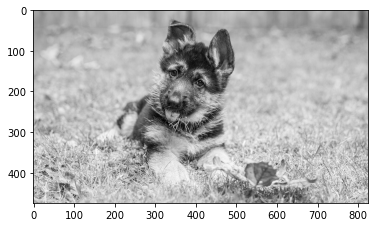

Type of original image:  uint8
Type of grayscale image:  uint8
Size of original image:  (475, 825, 3)
Size of grayscale image:  (475, 825)


In [10]:
# test on color image, final image not reshaped
puppy_img = read_img(puppy_path)
puppy_gray_img = convert_to_gray(puppy_img, reshape=False)
view_img(puppy_gray_img)
print("Type of original image: ", puppy_img.dtype)
print("Type of grayscale image: ", puppy_gray_img.dtype)
print("Size of original image: ", puppy_img.shape)
print("Size of grayscale image: ", puppy_gray_img.shape)

### Get image type
___

In [11]:
def get_type(img):
    return img.dtype

In [12]:
# test on color image
puppy_img = read_img(puppy_path)
print("Type of puppy image: ", get_type(puppy_img))

Type of puppy image:  uint8


### Get image shape
___

In [13]:
def get_shape(img):
    return img.shape

In [14]:
# test on color image
puppy_img = read_img(puppy_path)
print("Shape of puppy image: ", get_shape(puppy_img))

Shape of puppy image:  (475, 825, 3)


In [15]:
# test on grayscale image
puppy_img = read_img(puppy_path)
puppy_gray_img = convert_to_gray(puppy_img, reshape=False)
print("Shape of grayscale puppy image: ", get_shape(puppy_gray_img))

Shape of grayscale puppy image:  (475, 825)


In [16]:
# test on grayscale image (reshape)
puppy_img = read_img(puppy_path)
puppy_gray_img = convert_to_gray(puppy_img, reshape=True)
print("Shape of grayscale puppy image: ", get_shape(puppy_gray_img))

Shape of grayscale puppy image:  (475, 825, 3)


### Convert to float
___

In [17]:
def convert_to_float(img):
    img = img.astype(np.float64)
    
    total_channel = len(img.shape)
    for channel in range(total_channel):
        img[:,:,channel] = img[:,:,channel]/np.max(img[:,:,channel])
    return img

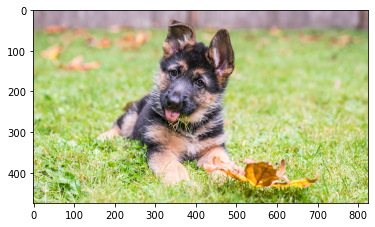

Range of pixel values: 0.00 to 1.00
Image data type:  float64


In [18]:
# test on color image
puppy_img = read_img(puppy_path)
puppy_img_float = convert_to_float(puppy_img)
view_img(puppy_img_float)
print("Range of pixel values: {:.2f} to {:.2f}".format(np.min(puppy_img_float),
                                                      np.max(puppy_img_float)))
print("Image data type: ", get_type(puppy_img_float))

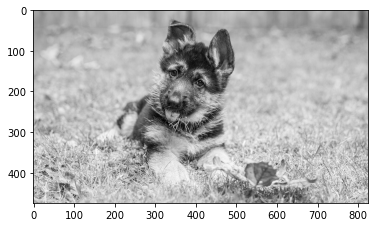

Range of pixel values: 0.00 to 1.00 
Image data type:  float64


In [19]:
# test on grayscale image
puppy_img = read_img(puppy_path)
puppy_gray_img = convert_to_gray(puppy_img)
puppy_gray_float_img = convert_to_float(puppy_gray_img)
view_img(puppy_gray_float_img)
print("Range of pixel values: {:.2f} to {:.2f} ".
     format(np.min(puppy_gray_float_img),
           np.max(puppy_gray_float_img)))
print("Image data type: ", get_type(puppy_gray_float_img))

### Convert to HSV
___

In [42]:
def convert_to_hsv(img):
    return cv.cvtColor(img, cv.COLOR_RGB2HSV)

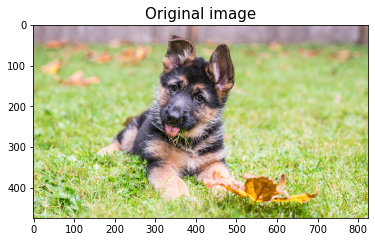

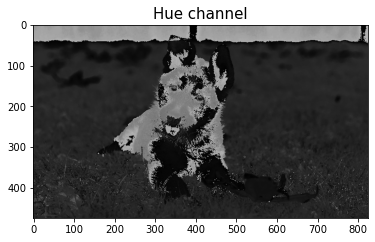

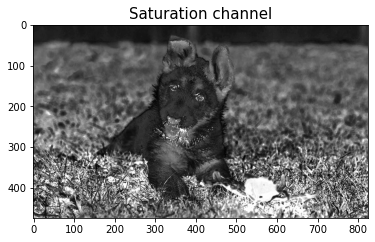

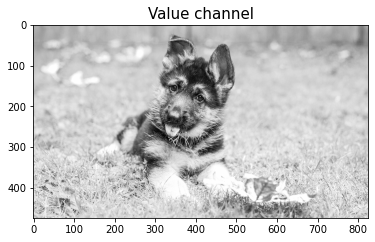

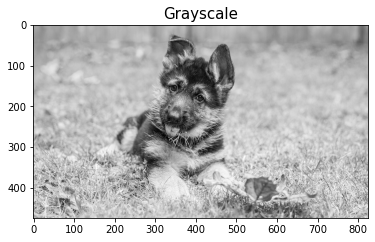

Shape of hsv image:  (475, 825, 3)
Range of hue:  0 179
Range of saturation:  0 255
Range of value:  0 255


In [56]:
# test on color image
puppy_img = read_img(puppy_path)
puppy_img_hsv = convert_to_hsv(puppy_img)
puppy_img_gray = convert_to_gray(puppy_img)
view_img(puppy_img, title="Original image")
view_img(puppy_img_hsv[:,:,0], title="Hue channel")
view_img(puppy_img_hsv[:,:,1], title="Saturation channel")
view_img(puppy_img_hsv[:,:,2], title="Value channel")
view_img(puppy_img_gray, title="Grayscale")

print("Shape of hsv image: ", puppy_img_hsv.shape)
print("Range of hue: ", np.min(puppy_img_hsv[:,:,0]), 
      np.max(puppy_img_hsv[:,:,0]))
print("Range of saturation: ", np.min(puppy_img_hsv[:,:,1]),
     np.max(puppy_img_hsv[:,:,1]))
print("Range of value: ", np.min(puppy_img_hsv[:,:,2]),
     np.max(puppy_img_hsv[:,:,2]))

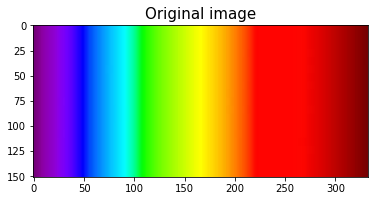

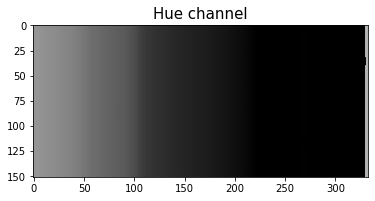

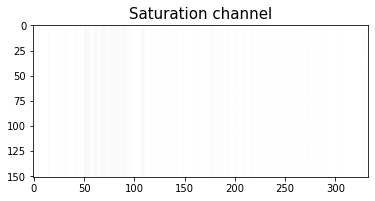

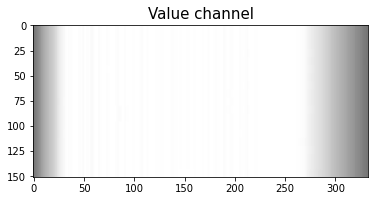

In [59]:
# test on spectrum image
spectrum = read_img(spectrum_path)
spectrum_hsv = convert_to_hsv(spectrum)
view_img(spectrum, title="Original image")
view_img(spectrum_hsv[:,:,0], title="Hue channel")
view_img(spectrum_hsv[:,:,1], title="Saturation channel")
view_img(spectrum_hsv[:,:,2], title="Value channel")

### Draw rectangle on image
___

In [20]:
def draw_rectangle(img, pt1, pt2, color=None, thickness=None):
    if color is None:
        color = (255,0,0)
    
    if thickness is None:
        thickness = 5
    
    cv.rectangle(img, pt1=pt1, pt2=pt2, color=color, thickness=thickness)
    return img

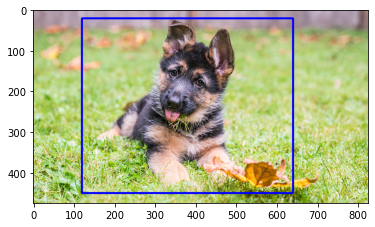

In [21]:
# test on color image
puppy_img = read_img(puppy_path)
puppy_img_rec = draw_rectangle(puppy_img, (120,450), (640, 20), 
                               color=(0,0,255), thickness=4)
view_img(puppy_img_rec)

### Crop image
___

In [22]:
def crop(img, pt1, pt2):
    
    pt1_x, pt1_y = pt1
    pt2_x, pt2_y = pt2
    
    Xstart, Xend = min(pt1_x, pt2_x), max(pt1_x, pt2_x)
    Ystart, Yend = min(pt1_y, pt2_y), max(pt1_y, pt2_y)
    
    if len(img.shape)==3:
        return img[Ystart:Yend+1, Xstart:Xend+1, :]
    elif len(img.shape)==2:
        return img[Ystart:Yend+1, Xstart:Xend+1]

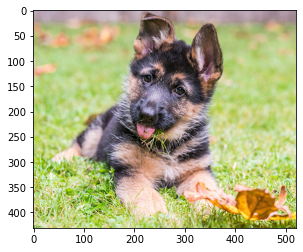

In [23]:
# test on color image
puppy_img = read_img(puppy_path)
cropped_puppy = crop(puppy_img, (120,450), (640,20))
view_img(cropped_puppy)

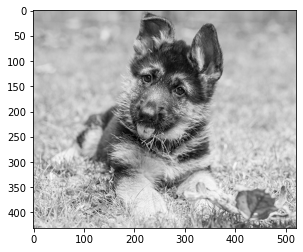

In [24]:
# test on non-reshaped grayscale image
puppy_img = read_img(puppy_path)
puppy_gray_img_1 = convert_to_gray(puppy_img, reshape=False)
cropped_gray_puppy_1 = crop(puppy_gray_img_1, (120,450), (640,20))
view_img(cropped_gray_puppy_1)

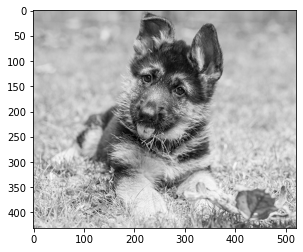

In [25]:
# test on reshaped grayscale image
puppy_img = read_img(puppy_path)
puppy_gray_img_2 = convert_to_gray(puppy_img, reshape=True)
cropped_gray_puppy_2 = crop(puppy_gray_img_2, (120,450), (640,20))
view_img(cropped_gray_puppy_2)

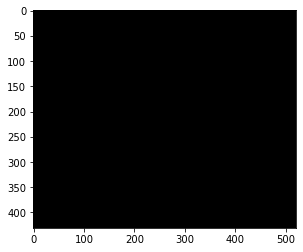

In [26]:
# Both reshaped and non-reshaped grayscale images appear identical
# from the appearance of their absolute pixel differences
view_img(np.abs(cropped_gray_puppy_1 - cropped_gray_puppy_2[:,:,0]))

### Inverse grayscale image
___

In [27]:
def invert(gray_img):
    return cv.bitwise_not(gray_img)

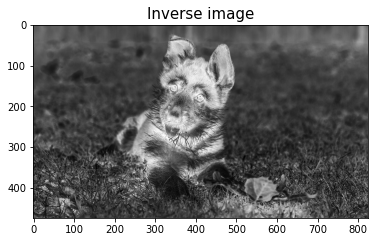

In [28]:
# test on reshaped grayscale image
puppy_img = read_img(puppy_path)
puppy_gray_img = convert_to_gray(puppy_img, reshape=True)
inverse_puppy_img = invert(puppy_gray_img)
view_img(inverse_puppy_img, title="Inverse image")

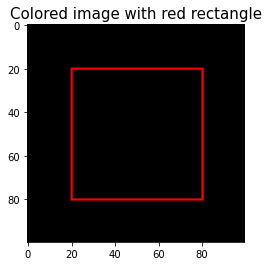

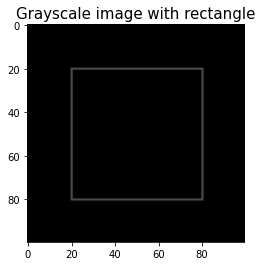

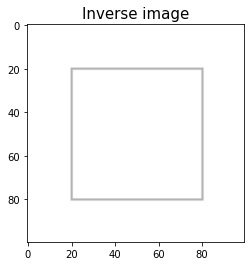

In [29]:
# test on artifical image, converted to grayscale (reshaped), then inverted
dark_img = np.zeros((100,100,3), dtype=np.uint8)
dark_rec_img = draw_rectangle(dark_img, (20,20), (80,80), thickness=1)
dark_rec_gray_img = convert_to_gray(dark_rec_img, reshape=True)
inverse_dark_rec_gray_img = invert(dark_rec_gray_img)
view_img(dark_rec_img, title="Colored image with red rectangle")
view_img(dark_rec_gray_img, title="Grayscale image with rectangle")
view_img(inverse_dark_rec_gray_img, title="Inverse image")

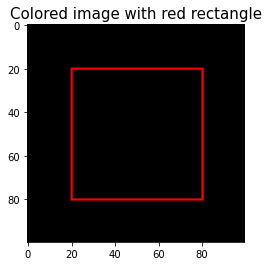

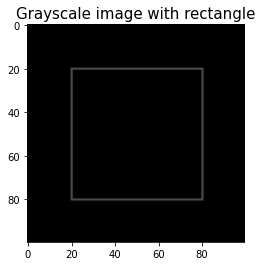

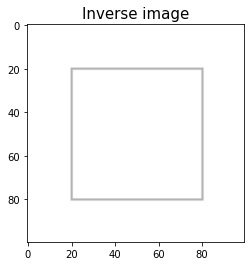

In [30]:
# test on artifical image, converted to grayscale (non-reshaped), then inverted
dark_img = np.zeros((100,100,3), dtype=np.uint8)
dark_rec_img = draw_rectangle(dark_img, (20,20), (80,80), thickness=1)
dark_rec_gray_img = convert_to_gray(dark_rec_img, reshape=False)
inverse_dark_rec_gray_img = invert(dark_rec_gray_img)
view_img(dark_rec_img, title="Colored image with red rectangle")
view_img(dark_rec_gray_img, title="Grayscale image with rectangle")
view_img(inverse_dark_rec_gray_img, title="Inverse image")

### Thresholding grayscale image
___

In [31]:
def thresholding(gray_img, threshold, top_value):
    return cv.threshold(gray_img, threshold, top_value, cv.THRESH_BINARY)[1]

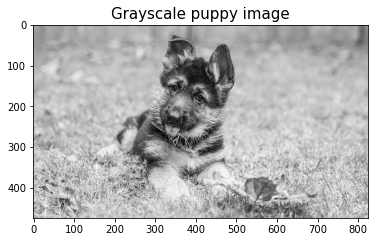

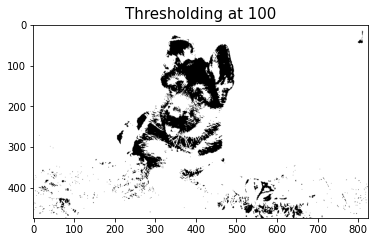

Shape of threshold image:  (475, 825)


In [32]:
# test on non-reshaped grayscale image
puppy_img = read_img(puppy_path)
puppy_gray_img = convert_to_gray(puppy_img, reshape=False)
view_img(puppy_gray_img, title="Grayscale puppy image")
puppy_thresh_img = thresholding(puppy_gray_img, 100, 255)
view_img(puppy_thresh_img, title="Thresholding at 100")
print("Shape of threshold image: ", puppy_thresh_img.shape)

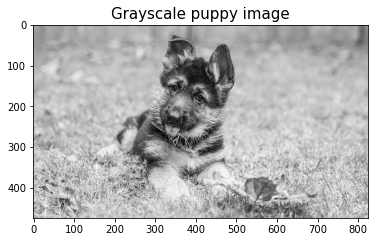

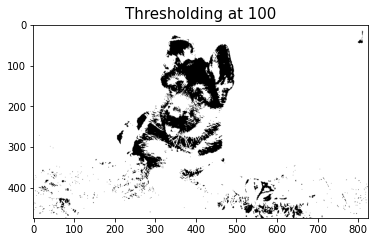

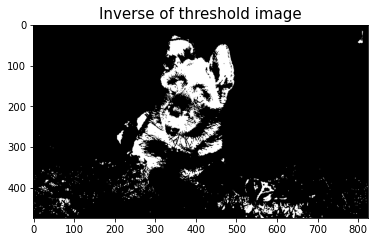

Shape of threshold image:  (475, 825, 3)


In [33]:
# test on reshaped grayscale image
puppy_img = read_img(puppy_path)
puppy_gray_img = convert_to_gray(puppy_img, reshape=True)
view_img(puppy_gray_img, title="Grayscale puppy image")
puppy_thresh_img = thresholding(puppy_gray_img, 100, 255)
view_img(puppy_thresh_img, title="Thresholding at 100")
inverse_puppy_thresh_img = invert(puppy_thresh_img)
view_img(inverse_puppy_thresh_img, title="Inverse of threshold image")
print("Shape of threshold image: ", puppy_thresh_img.shape)

### Masking with grayscale thresholding
___

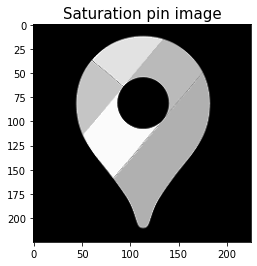

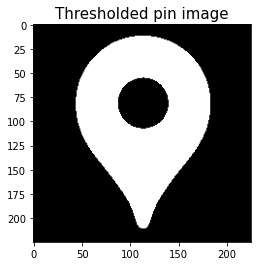

Shape of pin_img_sat (225, 225)


In [217]:
pin_img = read_img(pin_path)
pin_img_sat = convert_to_hsv(pin_img)[:,:,1]
pin_img_thresh = thresholding(pin_img_sat, 10, 255)
pin_img_thresh = reshape_2D_img(pin_img_thresh) # reshape to 3-channels
view_img(pin_img_sat, title="Saturation pin image")
view_img(pin_img_thresh, title="Thresholded pin image")
print("Shape of pin_img_sat", pin_img_sat.shape)

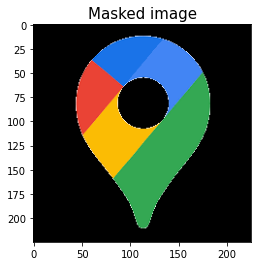

In [218]:
pin_img_mask = np.where(pin_img_thresh==255, pin_img, 0)
view_img(pin_img_mask, title="Masked image")

### Color thresholding
___

In [223]:
def color_thresholding(img, lower_bound, upper_bound):
    lower_bound_arr = np.asarray(lower_bound)
    upper_bound_arr = np.asarray(upper_bound)
    
    # create mask
    mask = cv.inRange(img, lower_bound_arr, upper_bound_arr)
    
    return cv.bitwise_and(img, img, mask=mask)
            

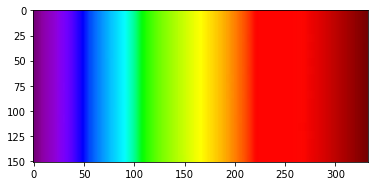

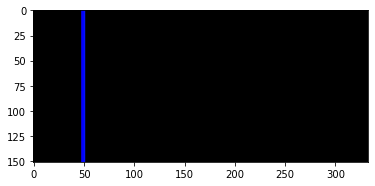

In [224]:
# test on multiple channel spectrum image
spectrum_img = read_img(spectrum_path)
spectrum_img_filter = color_thresholding(spectrum_img, (0,0,150), (20,20,255))
view_img(spectrum_img)
view_img(spectrum_img_filter)

### Resize
___

In [36]:
def resize(img, width_scale_factor, height_scale_factor):
    height, width , _ = img.shape
    
    new_width = int(width * width_scale_factor)
    new_height = int(height * height_scale_factor)
        
    return cv.resize(img, (new_width, new_height))

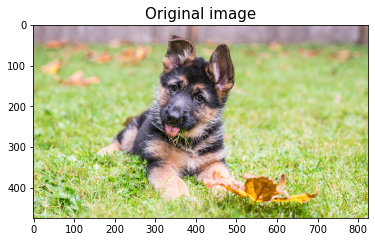

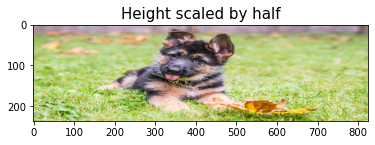

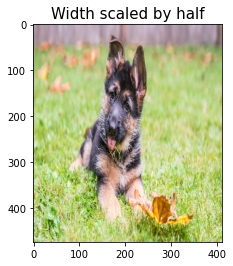

Shape of original image:  (475, 825, 3)
Shape of height-resized image:  (237, 825, 3)
Shape of width-resized image:  (475, 412, 3)


In [37]:
# scale widht and height by half separately
puppy_img = read_img(puppy_path)
height_resized_puppy_img = resize(puppy_img, 1, 0.5)
width_resized_puppy_img = resize(puppy_img, 0.5, 1)
view_img(puppy_img, title="Original image")
view_img(height_resized_puppy_img, title="Height scaled by half")
view_img(width_resized_puppy_img, title="Width scaled by half")
print("Shape of original image: ", puppy_img.shape)
print("Shape of height-resized image: ", height_resized_puppy_img.shape)
print("Shape of width-resized image: ", width_resized_puppy_img.shape)